In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 0. Загрузка csv файлов с GitHub

In [3]:
btc_url = "https://raw.githubusercontent.com/Sheisuka/BTC-Analytics/refs/heads/main/data/stage/btc.csv"
spx_url = "https://raw.githubusercontent.com/Sheisuka/BTC-Analytics/refs/heads/main/data/stage/spx.csv"
dff_url = "https://raw.githubusercontent.com/Sheisuka/BTC-Analytics/refs/heads/main/data/stage/effr.csv"
fng_url = "https://raw.githubusercontent.com/Sheisuka/BTC-Analytics/refs/heads/main/data/stage/fng.csv"

In [4]:
btc = pd.read_csv(btc_url, parse_dates=["date"]).set_index("date").sort_index()
spx = pd.read_csv(spx_url, parse_dates=["date"]).set_index("date").sort_index()
dff = pd.read_csv(dff_url, parse_dates=["date"]).set_index("date").sort_index()
fng = pd.read_csv(fng_url, parse_dates=["date"]).set_index("date").sort_index()

# 1. Статистика и пропуски

In [5]:
for df in [btc, spx, dff, fng]:
    assert df.index.is_unique and df.index.is_monotonic_increasing
    assert df.notna().all().all()


In [6]:
print(f"Таймлайн btc датасета: c {btc.index.min().date()} по {btc.index.max().date()}")
display(btc.describe())

Таймлайн btc датасета: c 2013-01-02 по 2025-05-29


,open,close,high,low,volume,volume_usd
count,4531.000000,4531.000000,4531.000000,4531.000000,4.531000e+03,4.531000e+03
mean,19378.466473,19401.771824,19823.487131,18915.284291,2.974293e+05,7.514750e+09
std,25299.284683,25330.060193,25821.846070,24765.760899,2.984588e+05,1.038947e+10
min,13.294495,13.294495,13.423249,13.239912,1.054983e+03,2.090994e+05
25%,597.956980,598.916689,608.320248,584.331943,6.686250e+04,2.550681e+07
50%,7954.649924,7960.659911,8237.678966,7689.995949,2.398905e+05,2.607672e+09
75%,29824.334489,29839.775316,30408.630125,29211.163290,3.944102e+05,1.279212e+10
max,111695.395496,111695.395496,111960.503548,109309.133852,3.137129e+06,1.047658e+11


In [7]:
print(f"Таймлайн spx датасета: c {spx.index.min().date()} по {spx.index.max().date()}")
display(spx.describe())

Таймлайн spx датасета: c 2013-01-02 по 2025-05-29


,open,close,high,low
count,4531.000000,4531.000000,4531.000000,4531.000000
mean,3182.532187,3183.377782,3199.475235,3164.431567
std,1229.456579,1229.813794,1236.909743,1221.832599
min,1426.190000,1457.150000,1461.890000,1426.190000
25%,2091.630000,2092.830000,2100.990000,2084.130000
50%,2832.410000,2834.400000,2845.570000,2819.230000
75%,4153.365000,4157.050000,4180.190000,4126.765000
max,6134.500000,6144.150000,6147.430000,6111.150000


In [8]:
print(f"Таймлайн fng датасета: c {fng.index.min().date()} по {fng.index.max().date()}")
display(fng.describe())

Таймлайн fng датасета: c 2018-02-01 по 2025-07-17


,value
count,2724.000000
mean,47.495595
std,21.788866
min,5.000000
25%,28.000000
50%,47.000000
75%,67.000000
max,95.000000


In [9]:
print(f"Таймлайн dff датасета: c {dff.index.min().date()} по {dff.index.max().date()}")
display(dff.describe())

Таймлайн dff датасета: c 1954-07-01 по 2025-07-15


,DFF
count,25948.000000
mean,4.607396
std,3.570678
min,0.040000
25%,1.880000
50%,4.330000
75%,6.150000
max,22.360000


In [10]:
t_int = btc.index.intersection(spx.index).intersection(fng.index).intersection(dff.index)
print(f"Пересечение дат btc, spx, fng, dff: c {t_int.min().date()} по {t_int.max().date()}")

Пересечение дат btc, spx, fng, dff: c 2018-02-01 по 2025-05-29


# 2. Визуализация данных

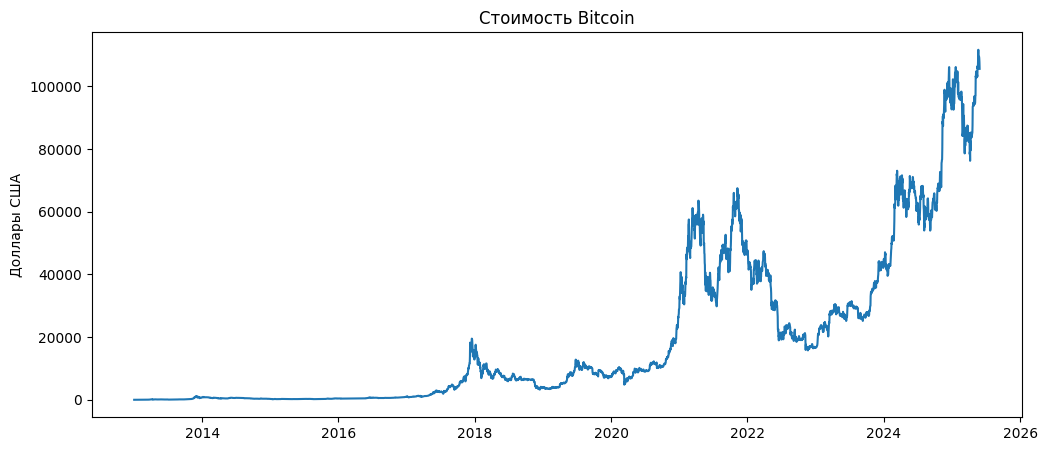

In [20]:
fig = plt.figure(figsize=(12, 5))

plt.plot(btc.index, btc["close"])

plt.title("Cтоимость Bitcoin")
plt.ylabel("Доллары США")

plt.show()

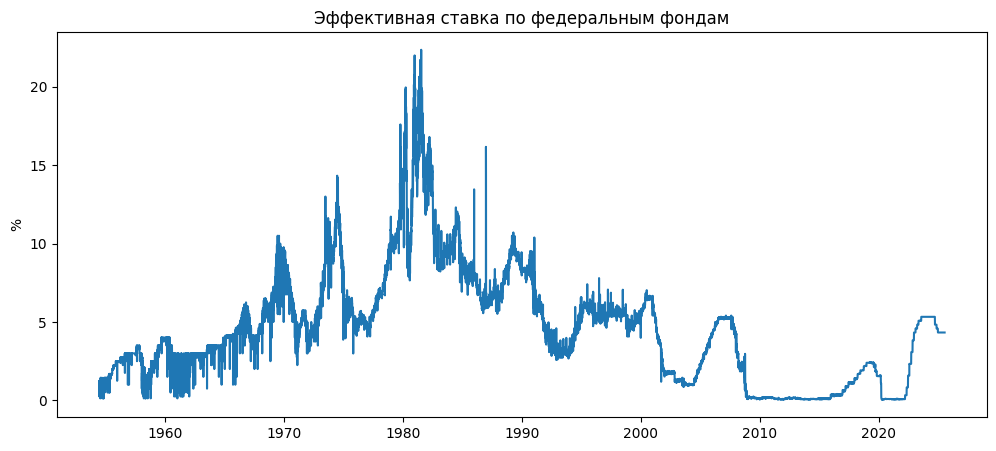

In [15]:
fig = plt.figure(figsize=(12, 5))

plt.plot(dff.index, dff["DFF"])

plt.title("Эффективная ставка по федеральным фондам")
plt.ylabel("%")

plt.show()

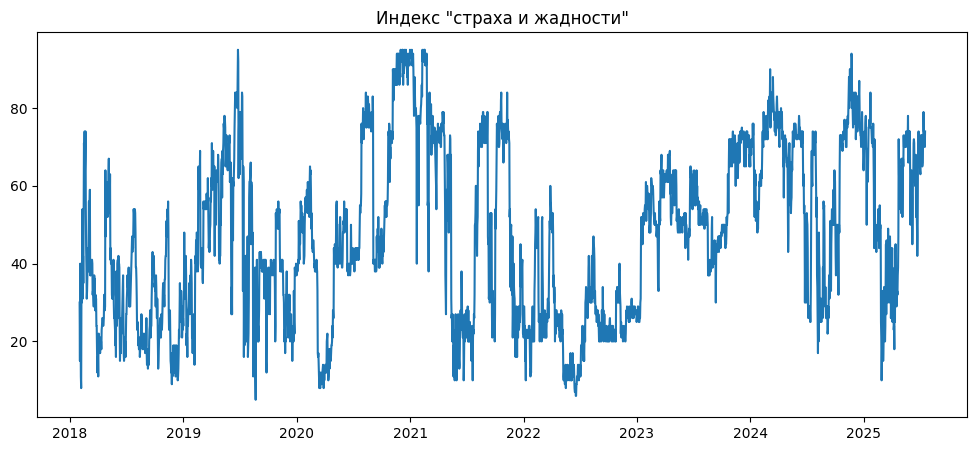

In [17]:
fig = plt.figure(figsize=(12, 5))

plt.plot(fng.index, fng["value"])

plt.title("Индекс \"страха и жадности\"")

plt.show()

In [33]:
spx_trading_days = spx[spx["is_trading_day"]]
spx_weekend_days = spx[spx["is_trading_day"] == False]

work_days    = int(spx["is_trading_day"].sum())
weekend_days = int((spx["is_trading_day"] == False).sum())

cats = ["Рабочие", "Выходные"]
vals = [work_days, weekend_days]

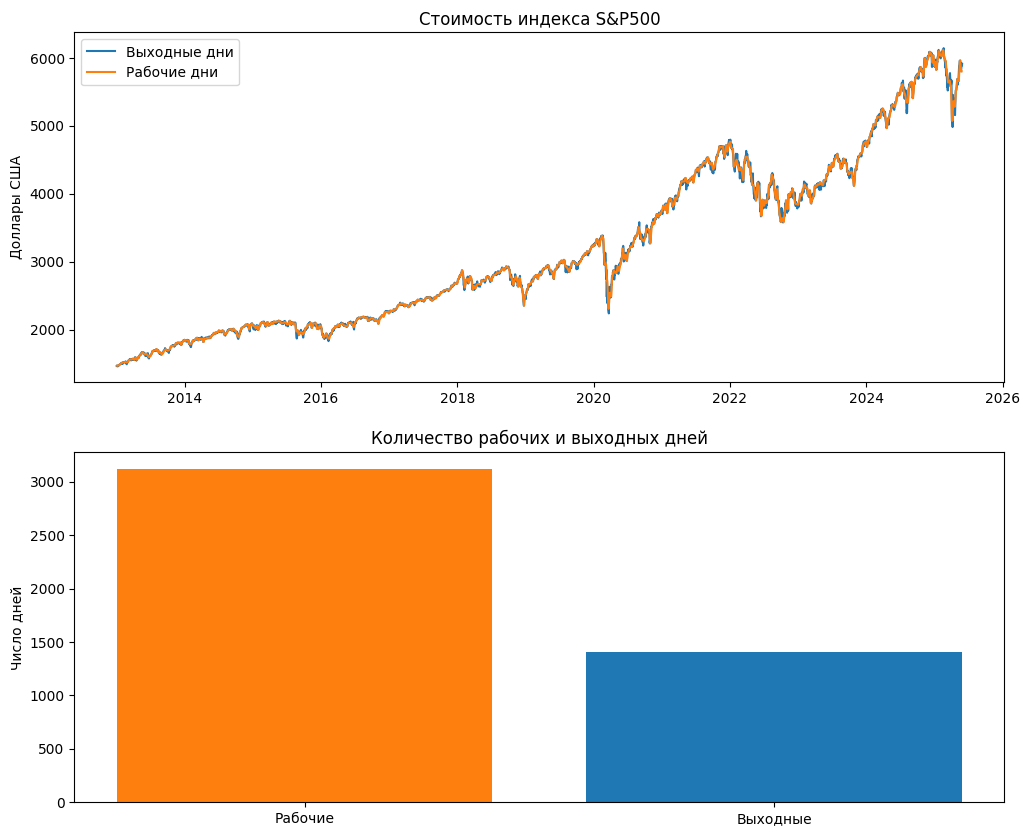

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(spx_trading_days.index, spx_trading_days["close"])
axs[0].plot(spx_weekend_days.index, spx_weekend_days["close"])

axs[0].set_title("Стоимость индекса S&P500")
axs[0].set_ylabel("Доллары США")
axs[0].legend(["Выходные дни", "Рабочие дни"])

color = ['tab:orange', 'tab:blue']
axs[1].bar(cats, vals, color=color)
axs[1].set_title("Количество рабочих и выходных дней")
axs[1].set_ylabel("Число дней")

plt.show()
